In [68]:
import rasterio
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from enum import Enum
from shapely import Point, LineString, Polygon
import ast
from CPP_Planner import CPP_Planner_Kit
from rasterio.mask import mask

In [69]:
straight_swaths = gpd.read_file('GIS_data/路径规划优化用数据/all_swaths/all_straight_swaths_group.shp')
real_swaths = gpd.read_file('GIS_data/路径规划优化用数据/all_swaths/all_swaths_group.shp')
real_swaths_clip = real_swaths[: 28]

<AxesSubplot: >

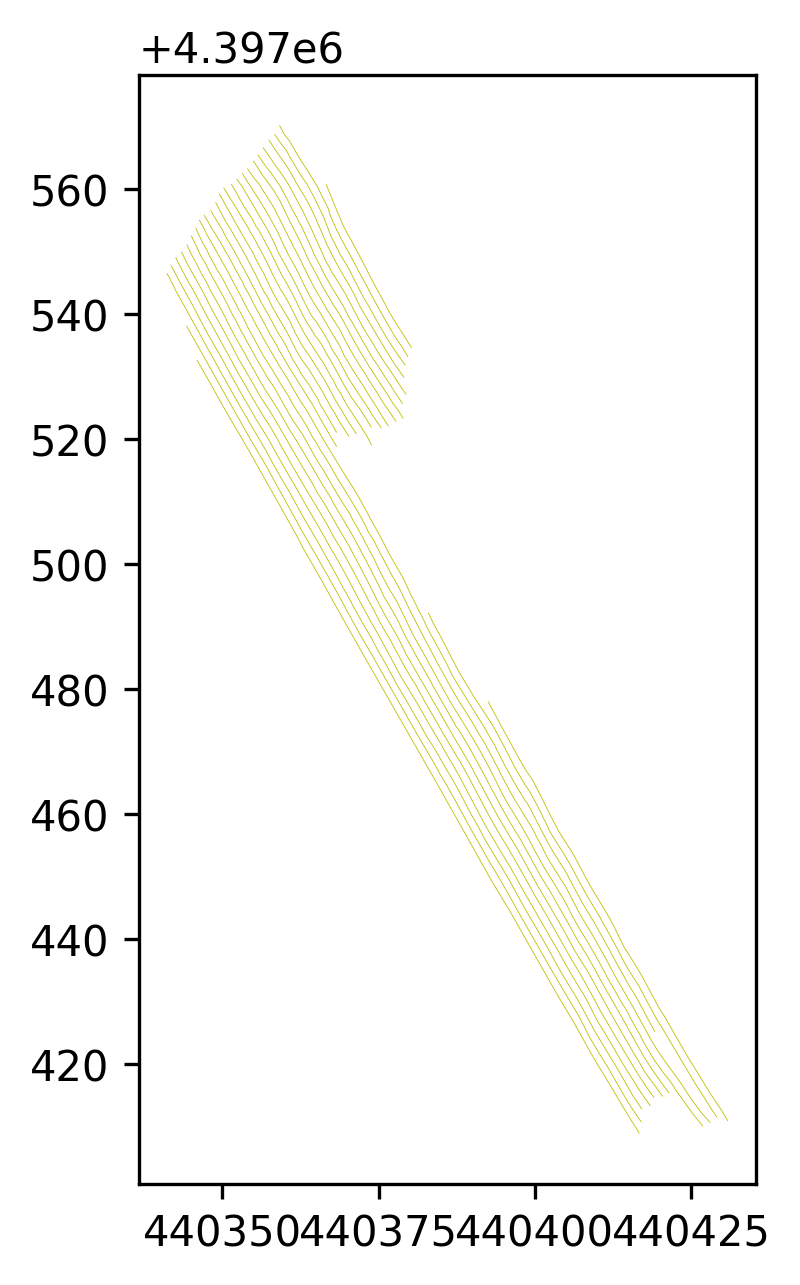

In [70]:
_, ax = plt.subplots(dpi=300)
real_swaths_clip.plot(ax=ax, color='y', linewidth=0.2)

<AxesSubplot: >

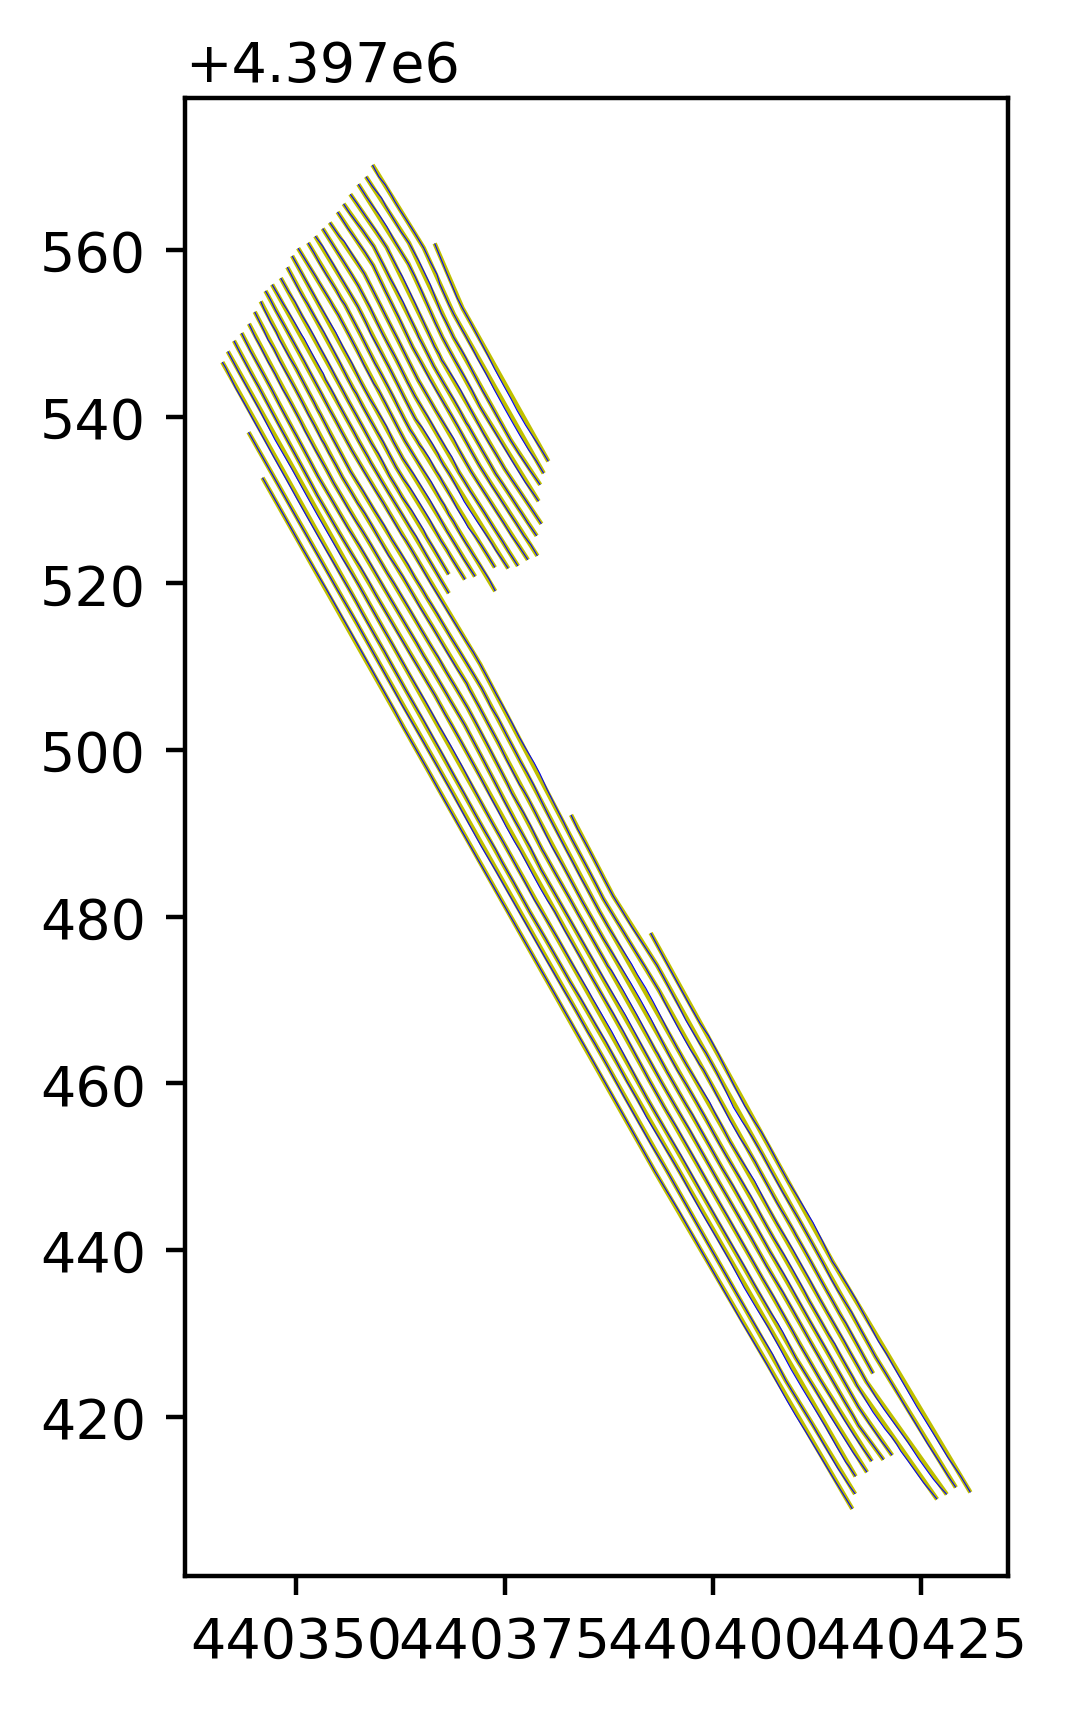

In [71]:
# simplify all line
all_simplified_line = []
for temp_line in real_swaths_clip.geometry:
    temp_simplified_line = temp_line.simplify(0.3, preserve_topology=False)
    all_simplified_line.append(temp_simplified_line)
simplified_gdf = gpd.GeoDataFrame(geometry=all_simplified_line, crs=real_swaths.crs)
_, ax = plt.subplots(dpi=400)
simplified_gdf.plot(ax=ax, color='y', linewidth=0.8)
real_swaths_clip.plot(ax=ax, color='b', linewidth=0.2)